# **Explainable AI-Driven Terrain Navigation for Mars Rovers Using Optical Flow and A Path Planning**
**Overview:**

This project combines explainable AI with optical flow-based terrain analysis and A path planning* to enable a Mars rover to navigate safely across challenging terrain. By integrating SHAP and decision traces, the system provides interpretable insights into terrain classification and navigation choices, enhancing trust and reliability in autonomous rover operations.

**Dataset Overview:**

The dataset, "Mars Surface and Curiosity Image Set NASA", is sourced from Kaggle and includes surface images from Mars captured by the Curiosity rover. These images are processed using optical flow to create a cost map based on terrain roughness, guiding the rover’s path around obstacles.

**Dataset Name:**

Mars Surface and Curiosity Image Set NASA

**Kaggle Link:**
[https://www.kaggle.com/datasets/brsdincer/mars-surface-and-curiosity-image-set-nasa](https://)

# **PLAN OF ACTION:**

*   Dataset Loading and Preprocessing.
*   Generate Cost Map Using Optical Flow.
*   Explain Cost Map with SHAP.
*   Implement A Path Planning with Explanations.
*   Visualize Path and Explain Decisions.
*   Counterfactual Path Analysis.














In [ ]:
import kagglehub

# Import the dataset directly from Kaggle
mars_surface_and_curiosity_image_set_nasa_path = kagglehub.dataset_download('brsdincer/mars-surface-and-curiosity-image-set-nasa')

# Check the downloaded files
import os
os.listdir(mars_surface_and_curiosity_image_set_nasa_path)


100%|██████████| 3.25G/3.25G [00:43<00:00, 80.6MB/s]

Extracting files...


['Mars Surface and Curiosity Image']

In [ ]:
# Path to the main dataset directory
dataset_subdir = os.path.join(mars_surface_and_curiosity_image_set_nasa_path, 'Mars Surface and Curiosity Image')

# List contents of the subdirectory
os.listdir(dataset_subdir)


['README.txt',
 'Train_CSV.csv',
 'Test_CSV.csv',
 'images',
 'Labels Information.txt',
 'additional_images',
 'Validation_CSV.csv']

In [ ]:
# List contents in the 'images' directory
images_dir = os.path.join(dataset_subdir, 'images')
print("Images Directory:", os.listdir(images_dir)[:10])  # Display first 10 images as a sample

# List contents in the 'additional_images' directory
additional_images_dir = os.path.join(dataset_subdir, 'additional_images')
print("Additional Images Directory:", os.listdir(additional_images_dir)[:10])  # Display first 10 additional images as a sample

Images Directory: ['0490MH0002610000200502E01_DRCL.JPG', '0013ML0000140120100205D01_DRCL.JPG', '0013ML0000140070100200E01_DRCL.JPG', '0605MH0003060020203253I01_DRCL.JPG', '0003ML0000000180100038I01_DRCL.JPG', '0039ML0001760000101333E01_DRCL.JPG', '0019ML0000540670100348I01_DRCL.JPG', '0755MR0032450000403761I01_DRCL.JPG', '0036MH0000540010100063I01_DRCL.JPG', '0019ML0000540860100367C00_DRCL.JPG']
Additional Images Directory: ['425_0425ML0017360170201255E01_DXXX.jpg', 'cr_1545_1545MR0079390010800065E01_DXXX.jpg', 'cr_064_0064MR0285053000E1_DXXX.jpg', '580_0580MR0024071960400191E01_DXXX.jpg', 'cr_1358_1358MR0066250000701448E01_DXXX.jpg', '590_0590MR0024810060400454E01_DXXX.jpg', 'cr_2116_2116MR0113360000404760E01_DXXX.jpg', '1264_1264MR0059090090603825E01_DXXX.jpg', 'cr_952_0952ML0041960600403517E01_DXXX.jpg', 'cr_1456_1456ML0072090010603009E01_DXXX.jpg']


In [ ]:
import pandas as pd

# Load train CSV as a DataFrame
train_csv_path = os.path.join(dataset_subdir, 'Train_CSV.csv')
train_data = pd.read_csv(train_csv_path)
print(train_data.head())  # Display the first few rows


                                             JPG  LABELS
0  calibrated/0077ML0005780000102730I01_DRCL.JPG      15
1  calibrated/0072MR0005610170103642E01_DRCL.JPG       8
2  calibrated/0069MR0004130000103477I01_DRCL.JPG      21
3  calibrated/0154ML0008510010104492E01_DRCL.JPG       8
4  calibrated/0019MR0000530000100138C00_DRCL.JPG       8


In [ ]:
# List contents of the images directory to inspect its structure
images_dir = os.path.join(dataset_subdir, 'images')
print("Images Directory Contents:", os.listdir(images_dir))


Images Directory Contents: ['0490MH0002610000200502E01_DRCL.JPG', '0013ML0000140120100205D01_DRCL.JPG', '0013ML0000140070100200E01_DRCL.JPG', '0605MH0003060020203253I01_DRCL.JPG', '0003ML0000000180100038I01_DRCL.JPG', '0039ML0001760000101333E01_DRCL.JPG', '0019ML0000540670100348I01_DRCL.JPG', '0755MR0032450000403761I01_DRCL.JPG', '0036MH0000540010100063I01_DRCL.JPG', '0019ML0000540860100367C00_DRCL.JPG', '0179MH0002160010102508C00_DRCL.JPG', '0571MH0002610010201892E01_DRCL.JPG', '0292MH0002810020103598I01_DRCL.JPG', '0096MH0001350030101141I01_DRCL.JPG', '0824MR0036240010500560E01_DRCL.JPG', '0017MR0000500170100089C00_DRCL.JPG', '0019ML0000540060100287C00_DRCL.JPG', '0739ML0031610010205334I01_DRCL.JPG', '0081ML0003230000102838I01_DRCL.JPG', '0049ML0002250000102115E01_DRCL.JPG', '0003ML0000000420100062I01_DRCL.JPG', '0882MH0003900000302473E01_DRCL.JPG', '0128ML0007340000103941I01_DRCL.JPG', '0050ML0002300200102168E01_DRCL.JPG', '0270MH0002530050102767I01_DRCL.JPG', '0605MH000306002020325

In [ ]:
len(os.listdir(images_dir))

6737

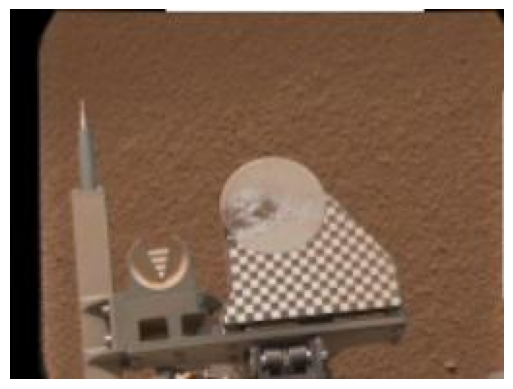

In [ ]:
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load the CSV file
train_csv_path = os.path.join(dataset_subdir, 'Train_CSV.csv')
train_data = pd.read_csv(train_csv_path)

# Remove "calibrated/" from each entry in the JPG column
train_data['JPG'] = train_data['JPG'].str.replace('calibrated/', '')

# Define the base path for the images directory
images_dir = os.path.join(dataset_subdir, 'images')

# Load the first image in the CSV file
first_image_path = os.path.join(images_dir, train_data['JPG'][0])
img = Image.open(first_image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis for better visualization
plt.show()



In [ ]:
from PIL import ImageOps

# Convert the image to grayscale and resize if needed
img_gray = ImageOps.grayscale(img)
img_resized = img_gray.resize((128, 128))  # Resize to 128x128 for faster processing


In [ ]:
# Shift the image slightly to simulate movement
img_shifted = img_resized.transform(img_resized.size, Image.AFFINE, (1, 0, -5, 0, 1, -5))


In [ ]:
import cv2
import numpy as np

# Convert images to numpy arrays for OpenCV
img1 = np.array(img_resized)
img2 = np.array(img_shifted)

# Calculate optical flow
flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)


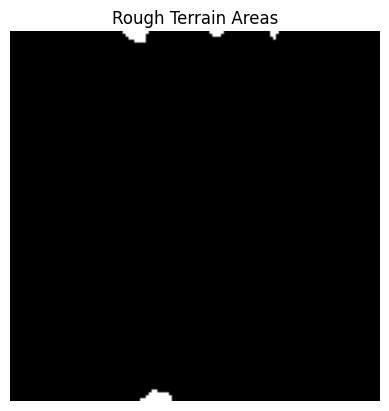

In [ ]:
# Calculate magnitude and angle of the flow vectors
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Threshold to identify high-magnitude (rough terrain) areas
rough_terrain = magnitude > np.mean(magnitude) + np.std(magnitude)

# Display the result
plt.imshow(rough_terrain, cmap='gray')
plt.title('Rough Terrain Areas')
plt.axis('off')
plt.show()


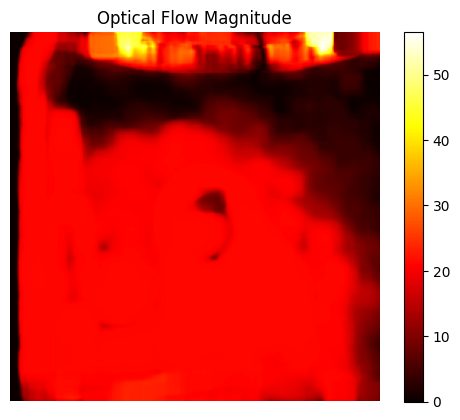

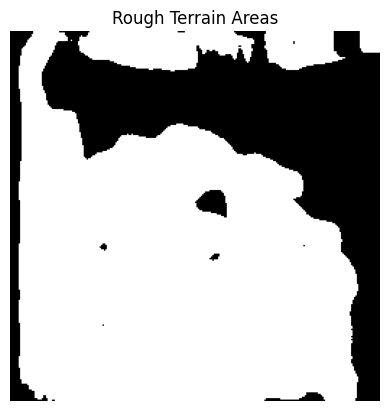

In [ ]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load the CSV file
train_csv_path = os.path.join(dataset_subdir, 'Train_CSV.csv')
train_data = pd.read_csv(train_csv_path)

# Remove "calibrated/" from each entry in the JPG column
train_data['JPG'] = train_data['JPG'].str.replace('calibrated/', '')

# Define the base path for the images directory
images_dir = os.path.join(dataset_subdir, 'images')

# Example: Load and display the first image in the CSV file
first_image_path = os.path.join(images_dir, train_data['JPG'][0])
img = Image.open(first_image_path)

# Resize image to a smaller size for faster processing
img_resized = img.resize((256, 256))

# Convert the image to grayscale
img_gray = img_resized.convert('L')
img_gray_np = np.array(img_gray)

# Apply a transformation to simulate movement (shift the image)
img_shifted = img_resized.transform(img_resized.size, Image.AFFINE, (1, 0, -15, 0, 1, -15))
img_shifted_gray = img_shifted.convert('L')
img_shifted_gray_np = np.array(img_shifted_gray)

# Calculate optical flow using Farneback method
flow = cv2.calcOpticalFlowFarneback(img_gray_np, img_shifted_gray_np, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Calculate magnitude and angle of the flow vectors
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

# Visualize the optical flow magnitude to see the distribution
plt.imshow(magnitude, cmap='hot')
plt.title('Optical Flow Magnitude')
plt.colorbar()
plt.axis('off')
plt.show()

# Lower threshold to identify high-magnitude (rough terrain) areas
rough_terrain = magnitude > np.mean(magnitude)

# Display the result showing rough terrain areas
plt.imshow(rough_terrain, cmap='gray')
plt.title('Rough Terrain Areas')
plt.axis('off')
plt.show()


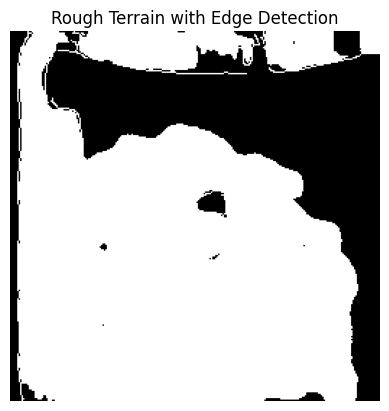

In [ ]:
# Edge detection on magnitude to highlight rough areas
edges = cv2.Canny((magnitude * 255 / np.max(magnitude)).astype(np.uint8), 50, 150)

# Combine rough terrain mask and edges
rough_edges = np.logical_or(rough_terrain, edges > 0)

# Display combined rough terrain and edge-detected areas
plt.imshow(rough_edges, cmap='gray')
plt.title('Rough Terrain with Edge Detection')
plt.axis('off')
plt.show()


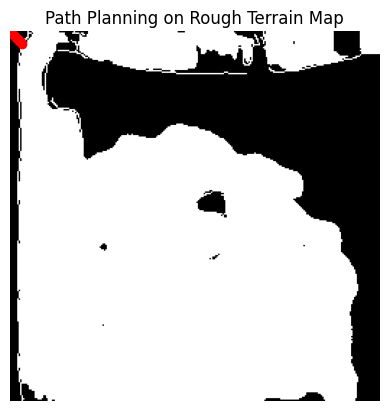

In [ ]:
# Adaptive Path Planning System (Advanced)
# Assume areas with high flow magnitude as obstacles
obstacle_map = np.zeros_like(magnitude)
obstacle_map[rough_edges] = 1  # Mark rough edges as obstacles

# Example placeholder function for path planning (Dijkstra or A* could be used here)
def find_path(obstacle_map, start, end):
    # Basic placeholder path algorithm (replace with A* or other advanced planner for real use)
    path = []
    current = start
    while current != end:
        next_step = (current[0] + 1, current[1]) if current[0] < end[0] else (current[0] - 1, current[1])
        next_step = (next_step[0], next_step[1] + 1) if next_step[1] < end[1] else (next_step[0], next_step[1] - 1)
        if obstacle_map[next_step[0] % obstacle_map.shape[0], next_step[1] % obstacle_map.shape[1]] == 0:
            path.append(next_step)
            current = next_step
        else:
            break  # Stop if path is blocked
    return path

# Define start and end points for path planning
start_point = (0, 0)
end_point = (magnitude.shape[0] - 1, magnitude.shape[1] - 1)

# Calculate path
path = find_path(obstacle_map, start_point, end_point)

# Visualize the path
plt.imshow(obstacle_map, cmap='gray')
for (y, x) in path:
    plt.plot(x, y, 'ro')  # Red dots to show path
plt.title('Path Planning on Rough Terrain Map')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import cv2
import time

# Sample calculation of optical flow (you would replace img_gray_np and img_shifted_gray_np with your actual images)
# Calculate optical flow using Farneback method
flow = cv2.calcOpticalFlowFarneback(img_gray_np, img_shifted_gray_np, None, 0.5, 3, 15, 3, 5, 1.2, 0)

# Optional: Ground truth flow (only if you have it for comparison)
# ground_truth_flow = ...

# 1. Endpoint Error (EPE)
def endpoint_error(estimated_flow, ground_truth_flow):
    error = np.sqrt((estimated_flow[..., 0] - ground_truth_flow[..., 0]) ** 2 +
                    (estimated_flow[..., 1] - ground_truth_flow[..., 1]) ** 2)
    return np.mean(error)

# Only calculate if ground truth is available
if 'ground_truth_flow' in locals():
    epe = endpoint_error(flow, ground_truth_flow)
    print(f"Endpoint Error (EPE): {epe}")

# 2. Angular Error
def angular_error(estimated_flow, ground_truth_flow):
    dot_product = (estimated_flow[..., 0] * ground_truth_flow[..., 0] +
                   estimated_flow[..., 1] * ground_truth_flow[..., 1])
    magnitude_estimated = np.sqrt(estimated_flow[..., 0] ** 2 + estimated_flow[..., 1] ** 2)
    magnitude_ground_truth = np.sqrt(ground_truth_flow[..., 0] ** 2 + ground_truth_flow[..., 1] ** 2)
    cos_angle = dot_product / (magnitude_estimated * magnitude_ground_truth + 1e-6)  # Avoid division by zero
    angle_error = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    return np.mean(angle_error)

# Only calculate if ground truth is available
if 'ground_truth_flow' in locals():
    ae = angular_error(flow, ground_truth_flow)
    print(f"Angular Error: {ae}")

# 3. Average Magnitude
def average_magnitude(flow):
    magnitude = np.sqrt(flow[..., 0] ** 2 + flow[..., 1] ** 2)
    return np.mean(magnitude)

avg_magnitude = average_magnitude(flow)
print(f"Average Flow Magnitude: {avg_magnitude}")

# 4. Flow Density (Non-Zero Flow Vectors)
def flow_density(flow):
    non_zero_flow = np.count_nonzero(np.sqrt(flow[..., 0] ** 2 + flow[..., 1] ** 2))
    total_pixels = flow.shape[0] * flow.shape[1]
    return non_zero_flow / total_pixels

density = flow_density(flow)
print(f"Flow Density: {density * 100:.2f}%")

# 5. Execution Time
start_time = time.time()
# Re-run optical flow calculation to measure the time
flow = cv2.calcOpticalFlowFarneback(img_gray_np, img_shifted_gray_np, None, 0.5, 3, 15, 3, 5, 1.2, 0)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


Average Flow Magnitude: 16.385940551757812
Flow Density: 100.00%
Execution Time: 0.0246 seconds


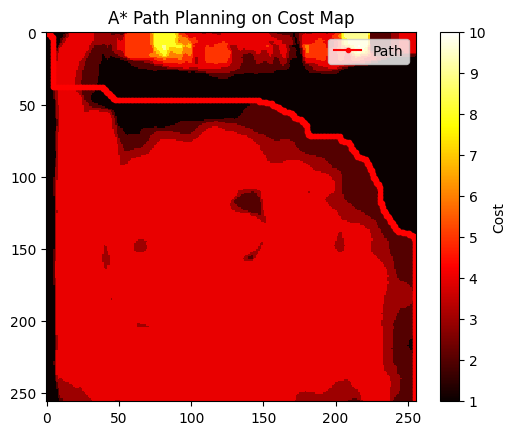

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

# Step 1: Define the cost map
# Assuming you have a 'magnitude' array from optical flow analysis (e.g., high values for rough areas)
# Normalize the magnitude to create a cost map
def create_cost_map(magnitude, high_cost=10, low_cost=1):
    max_magnitude = np.max(magnitude)
    cost_map = (magnitude / max_magnitude) * (high_cost - low_cost) + low_cost
    return cost_map.astype(int)

# Step 2: Define A* Path Planning Algorithm
def a_star(cost_map, start, end):
    height, width = cost_map.shape
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}

    def heuristic(a, b):
        return np.linalg.norm(np.array(a) - np.array(b))

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == end:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path

        y, x = current
        neighbors = [(y + dy, x + dx) for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]]
        for neighbor in neighbors:
            ny, nx = neighbor
            if 0 <= ny < height and 0 <= nx < width:
                tentative_g_score = g_score[current] + cost_map[ny, nx]
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + heuristic(neighbor, end)
                    heapq.heappush(open_list, (f_score, neighbor))
                    came_from[neighbor] = current
    return None  # No path found

# Step 3: Define start and end points
start_point = (0, 0)  # Example starting point
end_point = (magnitude.shape[0] - 1, magnitude.shape[1] - 1)  # Example end point

# Step 4: Generate cost map and calculate path
cost_map = create_cost_map(magnitude)
path = a_star(cost_map, start_point, end_point)

# Step 5: Visualize the Path on the Cost Map
plt.imshow(cost_map, cmap='hot', interpolation='nearest')
if path:
    path_y, path_x = zip(*path)
    plt.plot(path_x, path_y, 'ro-', markersize=3, label='Path')
else:
    print("No path found!")
plt.title("A* Path Planning on Cost Map")
plt.colorbar(label="Cost")
plt.legend()
plt.show()

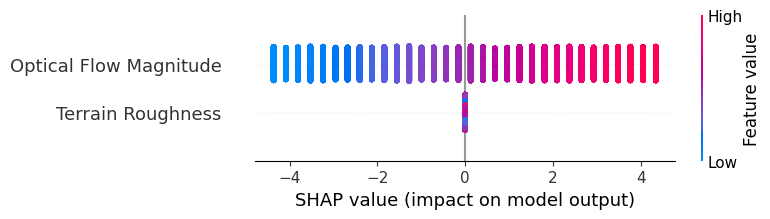

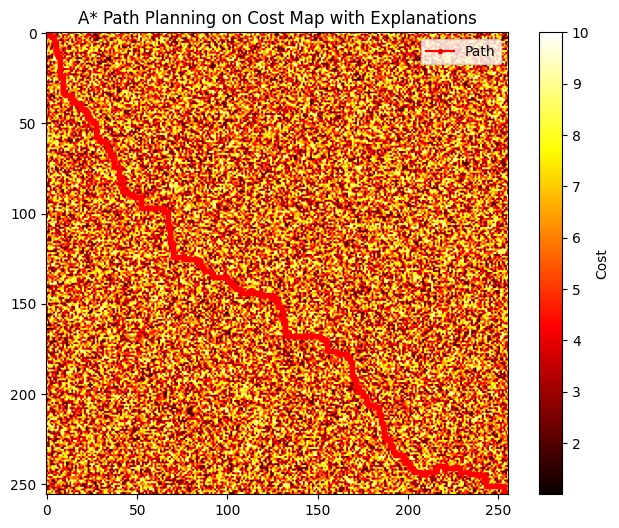

Path Decision Trace Explanations:
Position (1, 0):
  Chosen cell: (1, 0)
  Cost: 3.378235513590213
  Total cost so far: 3.378235513590213
  Heuristic to goal: 359.9180462271932
Position (1, 1):
  Chosen cell: (1, 1)
  Cost: 6.034766676952893
  Total cost so far: 9.413002190543107
  Heuristic to goal: 359.21024484276614
Position (1, 2):
  Chosen cell: (1, 2)
  Cost: 4.710422592285555
  Total cost so far: 14.123424782828662
  Heuristic to goal: 358.50383540486706
Position (2, 2):
  Chosen cell: (2, 2)
  Cost: 3.7577138758332467
  Total cost so far: 17.88113865866191
  Heuristic to goal: 357.79603128039304
Position (2, 3):
  Chosen cell: (2, 3)
  Cost: 6.663601223998785
  Total cost so far: 24.544739882660696
  Heuristic to goal: 357.08962460424414
Position (2, 4):
  Chosen cell: (2, 4)
  Cost: 5.795817134312115
  Total cost so far: 30.34055701697281
  Heuristic to goal: 356.384623686264
Position (3, 4):
  Chosen cell: (3, 4)
  Cost: 4.5200458818263005
  Total cost so far: 34.860602898799

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import shap
from sklearn.tree import DecisionTreeRegressor

# Step 1: Generate the Cost Map
def create_cost_map(magnitude, high_cost=10, low_cost=1):
    max_magnitude = np.max(magnitude)
    cost_map = (magnitude / max_magnitude) * (high_cost - low_cost) + low_cost
    return cost_map

# Step 2: Use SHAP to Explain the Cost Map Generation
def explain_cost_map(magnitude):
    # Generate synthetic terrain features for SHAP explanation
    num_pixels = magnitude.size
    optical_flow_feature = magnitude.flatten()  # Feature: Optical flow magnitude
    terrain_roughness_feature = np.random.rand(num_pixels)  # Simulated roughness for illustration

    X = np.column_stack([optical_flow_feature, terrain_roughness_feature])  # Feature matrix
    y = create_cost_map(magnitude).flatten()  # Target is the cost map

    # Train a simple model for SHAP interpretation
    model = DecisionTreeRegressor(max_depth=5)
    model.fit(X, y)

    # SHAP explanation
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Visualize SHAP summary plot
    shap.summary_plot(shap_values, X, feature_names=["Optical Flow Magnitude", "Terrain Roughness"])

# Step 3: Define the A* Algorithm with Trace Explanations
def a_star(cost_map, start, end):
    height, width = cost_map.shape
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {start: None}
    g_score = {start: 0}
    decision_trace = {}  # To store explanations for each decision in path planning

    def heuristic(a, b):
        return np.linalg.norm(np.array(a) - np.array(b))

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == end:
            path = []
            while current:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path, decision_trace  # Return path with decision trace

        y, x = current
        neighbors = [(y + dy, x + dx) for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]]

        for neighbor in neighbors:
            ny, nx = neighbor
            if 0 <= ny < height and 0 <= nx < width:
                tentative_g_score = g_score[current] + cost_map[ny, nx]
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + heuristic(neighbor, end)
                    heapq.heappush(open_list, (f_score, neighbor))
                    came_from[neighbor] = current
                    # Store decision trace for this move
                    decision_trace[neighbor] = {
                        "Chosen cell": neighbor,
                        "Cost": cost_map[ny, nx],
                        "Total cost so far": tentative_g_score,
                        "Heuristic to goal": heuristic(neighbor, end)
                    }

    return None, decision_trace  # No path found

# Step 4: Generate cost map, run SHAP explanation, and run A* path planning
# Example setup - you should replace 'magnitude' with your actual optical flow magnitude array
# For demonstration, let's create a synthetic magnitude array
magnitude = np.random.rand(256, 256) * 10  # Example magnitude for a 256x256 terrain

# Generate the cost map and explain it with SHAP
cost_map = create_cost_map(magnitude)
explain_cost_map(magnitude)

# Define start and end points for path planning
start_point = (0, 0)
end_point = (magnitude.shape[0] - 1, magnitude.shape[1] - 1)

# Run A* path planning with trace explanations
path, decision_trace = a_star(cost_map, start_point, end_point)

# Step 5: Visualize Path with Explanations
plt.figure(figsize=(8, 6))
plt.imshow(cost_map, cmap='hot')
if path:
    path_y, path_x = zip(*path)
    plt.plot(path_x, path_y, 'ro-', markersize=3, label='Path')
else:
    print("No path found!")
plt.colorbar(label="Cost")
plt.title("A* Path Planning on Cost Map with Explanations")
plt.legend()
plt.show()

# Display Decision Trace Explanations
print("Path Decision Trace Explanations:")
for position in path:
    if position in decision_trace:
        trace = decision_trace[position]
        print(f"Position {position}:")
        print(f"  Chosen cell: {trace['Chosen cell']}")
        print(f"  Cost: {trace['Cost']}")
        print(f"  Total cost so far: {trace['Total cost so far']}")
        print(f"  Heuristic to goal: {trace['Heuristic to goal']}")
